# Assignment 1 - Getting and parsing texts 

In [7]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup 
import re

#extract the data 
r=requests.get("https://www.gutenberg.org/cache/epub/1934/pg1934.txt")
data=BeautifulSoup(r.content).text
type(data)

data


'The Project Gutenberg eBook of Songs of Innocence and of Experience, by William Blake\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Songs of Innocence and of Experience\r\n\r\nAuthor: William Blake\r\n\r\nRelease Date: October, 1999 [eBook #1934]\r\n[Most recently updated: December 24, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: David Price\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE AND OF EXPERIENCE ***\r\n\r\n          [Picture: Image of Blake’s original page of The Tyger]\r\n\r\n\r\n\r\n\r\n\r\n                         

In [55]:
#check how the split looks like
contents

'CONTENTS\r\n\r\n             SONGS OF INNOCENCE\r\n\r\nIntroduction\r\nThe Shepherd\r\nThe Echoing Green\r\nThe Lamb\r\nThe Little Black Boy\r\nThe Blossom\r\nThe Chimney-Sweeper\r\nThe Little Boy Lost\r\nThe Little Boy Found\r\nLaughing Song\r\nA Cradle Song\r\nThe Divine Image\r\nHoly Thursday\r\nNight\r\nSpring\r\nNurse’s Song\r\nInfant Joy\r\nA Dream\r\nOn Another’s Sorrow\r\n\r\n             SONGS OF EXPERIENCE\r\n\r\nIntroduction\r\nEarth’s Answer\r\nThe Clod and the Pebble\r\nHoly Thursday\r\nThe Little Girl Lost\r\nThe Little Girl Found\r\nThe Chimney-Sweeper\r\nNurse’s Song\r\nThe Sick Rose\r\nThe Fly\r\nThe Angel\r\nThe Tiger\r\nMy Pretty Rose-Tree\r\nAh, Sunflower\r\nThe Lily\r\nThe Garden of Love\r\nThe Little Vagabond\r\nLondon\r\nThe Human Abstract\r\nInfant Sorrow\r\nA Poison Tree\r\nA Little Boy Lost\r\nA Little Girl Lost\r\nA Divine Image\r\nA Cradle Song\r\nTo Tirzah\r\nThe Schoolboy\r\nThe Voice of the Ancient Bard'

In [9]:
#split strings 
split=data.split('\r\n\r\n\r\n\r\n\r\n')

# create contents element
contents=split[2]
contents

#create a list of books and list of titles - working
b=re.compile("[A-Z]+\s[A-Z]+\s[A-Z]+")
books=b.findall(contents) #book finder
books


#create a list of titles - not workin
t=re.compile("\n[A-Z][a-z]+(/s[A-Z][a-z]+)*\r")
c=re.compile("(\r\n){2}.+(\r\n){2}")
titles=c.findall(contents)
titles




[('\r\n', '\r\n'), ('\r\n', '\r\n')]

In [10]:
split[-2]

'THE VOICE OF THE ANCIENT BARD\r\n\r\n\r\nYouth of delight! come hither\r\nAnd see the opening morn,\r\nImage of Truth new-born.\r\nDoubt is fled, and clouds of reason,\r\nDark disputes and artful teazing.\r\nFolly is an endless maze;\r\nTangled roots perplex her ways;\r\nHow many have fallen there!\r\nThey stumble all night over bones of the dead;\r\nAnd feel—they know not what but care;\r\nAnd wish to lead others, when they should be led.'

In [11]:
#create dataframe 
rows=[]
df=pd.DataFrame(rows, columns=["Line","line_number", "stanza_number", "poem_title","book_title"])

In [15]:
#select part with poems
poems=split[3:51]

rows=[]


for poem in poems:
    if poem== books[0]:
        book1=poem
        #print(book1)        
    
    
    else: 
        splitted_poem=poem.split("\r\n")
        #splitted_poem=splitted_poem.replace("\r", " ")
        #print(splitted_poem)
        #print (splitted_poem) #it's a list -> Can't split it anymore
        #remove title of poem
        title_poem=splitted_poem[0]
        splitted_poem=splitted_poem[3:]
        print(splitted_poem)
        
        for x in splitted_poem:
            stanza=x.split(" \' \'")
            print (stanza)
            
            
            
           # for y in stanza: 
                #print (type(y))
                #pass
        
        
        #count=0
        #for i in splitted_poem:
            #count+=1
           # rows.append([i, count, 0, title_poem, book1])
            

#df=pd.DataFrame(rows, columns=["Line","line_number", "stanza_number", "poem_title","book_title"])

#df
            
        
        #stanzas=splitted_poem.split("\n")
        #print(stanzas)
        
        
        
        
               
                 
        
              
        
              
        
                   
          #enumerate   
            
        #lines=splitted_poem.split("\n")
        # print (lines)
        

['Piping down the valleys wild,', '    Piping songs of pleasant glee,', 'On a cloud I saw a child,', '    And he laughing said to me:', '', '‘Pipe a song about a Lamb!’', '    So I piped with merry cheer.', '‘Piper, pipe that song again.’', '    So I piped: he wept to hear.', '', '‘Drop thy pipe, thy happy pipe;', '    Sing thy songs of happy cheer!’', 'So I sung the same again,', '    While he wept with joy to hear.', '', '‘Piper, sit thee down and write', '    In a book, that all may read.’', 'So he vanished from my sight;', '    And I plucked a hollow reed,', '', 'And I made a rural pen,', '    And I stained the water clear,', 'And I wrote my happy songs', '    Every child may joy to hear.']
['How sweet is the shepherd’s sweet lot!', 'From the morn to the evening he strays;', 'He shall follow his sheep all the day,', 'And his tongue shall be fillèd with praise.', '', 'For he hears the lambs’ innocent call,', 'And he hears the ewes’ tender reply;', 'He is watchful while they are in p

In [ ]:
poems=split[3:51]

rows=[]


for poem in poems:
    if poem== books[0]:
        book1=poem
        #print(book1)        
    
    
    else: 
        splitted_poem=poem.split("\r\n")
        #splitted_poem=splitted_poem.replace("\r", " ")
        #print(splitted_poem)
        #print (splitted_poem) #it's a list -> Can't split it anymore
        #remove title of poem
        title_poem=splitted_poem[0]
        splitted_poem=splitted_poem[3:]
        print(splitted_poem)
        
        for x in splitted_poem:
            stanza=x.split(" \' \'")
            print (stanza)
            
            
            





# Visualizing text data 


In [16]:
df= pd.read_csv('innocence_experience.csv')
df.head(5)

,book,poem,line_n,stanza_n,text
0,SONGS OF INNOCENCE,INTRODUCTION,0,0,"Piping down the valleys wild,"
1,SONGS OF INNOCENCE,INTRODUCTION,1,0,"Piping songs of pleasant glee,"
2,SONGS OF INNOCENCE,INTRODUCTION,2,0,"On a cloud I saw a child,"
3,SONGS OF INNOCENCE,INTRODUCTION,3,0,And he laughing said to me:
4,SONGS OF INNOCENCE,INTRODUCTION,4,1,‘Pipe a song about a Lamb!’


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    print(col)

book
poem
line_n
stanza_n
text


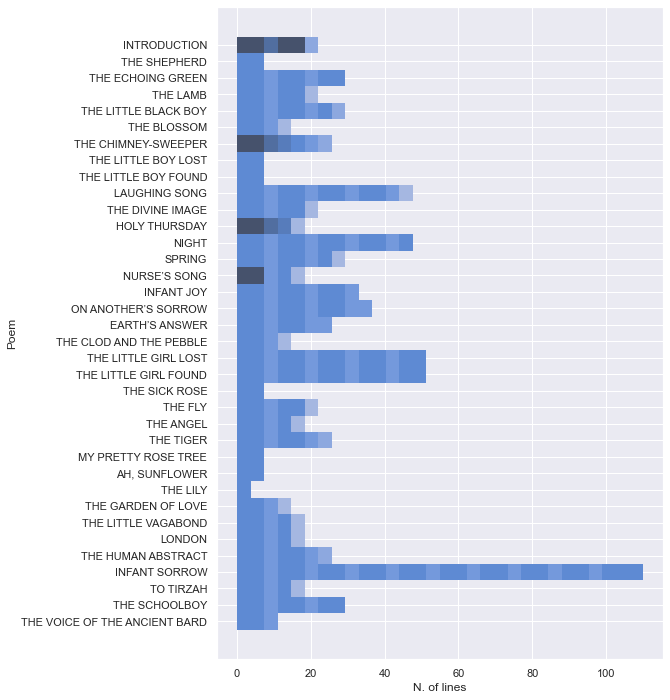

In [53]:
# Create a histogram showing the number of lines per poem 

his = (df
.groupby(["poem"])
.count()
#.to_frame()
.reset_index()
)

#can be better 
ax = sns.histplot(data=df, x="line_n", y="poem")
ax.set(xlabel="N. of lines", ylabel="Poem")
sns.set(rc = {'figure.figsize':(6, 9)})
#plt.savefig("plots/pubs_time_bar_sns.png")





In [64]:
#Create a document feature matrix treating each line as a document
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pprint

texts = poems
vectorizer = CountVectorizer()
vects= vectorizer.fit_transform(texts)





In [ ]:
#Create a separate document feature matrix treating each poem as a document


In [ ]:
#Using one of these document feature matrices, create a plot that compares the frequency of words in each book. 
#Comment on the features that are more or less frequent in one book than another.